# Matplotlib 퀴즈

다음은 대한민국 영화 중에서 관객 수가 가장 많은 상위 8개의 데이터입니다.  
주어진 코드를 이용하여 퀴즈를 풀어보시오.

## 주의사항

1. 코드는 영상 본문 또는 고정 댓글로 제공됩니다. 
2. 해결이 어려운 경우 구글링 또는 앞에서 공부한 내용을 참고하셔도 좋습니다. 

In [9]:
import matplotlib.pyplot as plt

import matplotlib
import pandas as pd

matplotlib.rcParams["font.family"] = "Malgun Gothic"  # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams["font.size"] = 15
matplotlib.rcParams["axes.unicode_minus"] = False

data = {
    "영화": ["명량", "극한직업", "신과함께-죄와 벌", "국제시장", "괴물", "도둑들", "7번방의 선물", "암살"],
    "개봉 연도": [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    "관객 수": [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270],  # (단위 : 만 명)
    "평점": [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10],
}
df = pd.DataFrame(data)
df


,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


## 1) 영화 데이터를 활용하여 x 축은 영화, y 축은 평점인 막대 그래프를 만드시오. 

<BarContainer object of 8 artists>

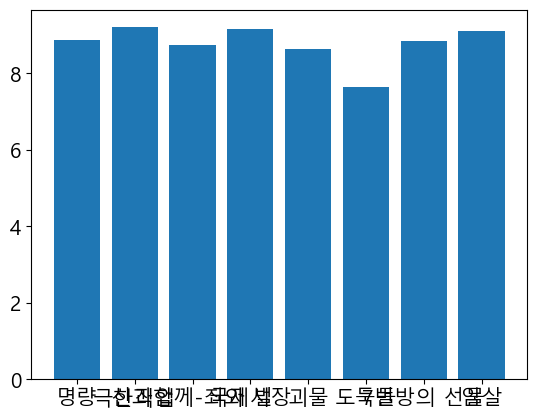

In [4]:
plt.bar(df["영화"], df["평점"])


## 2) 앞에서 만든 막대 그래프에 제시된 세부 사항을 적용하시오. 

- 제목: 국내 Top 8 영화 평점 정보
- x축 label: 영화 (90도 회전)
- y축 label: 평점

Text(0, 0.5, '평점')

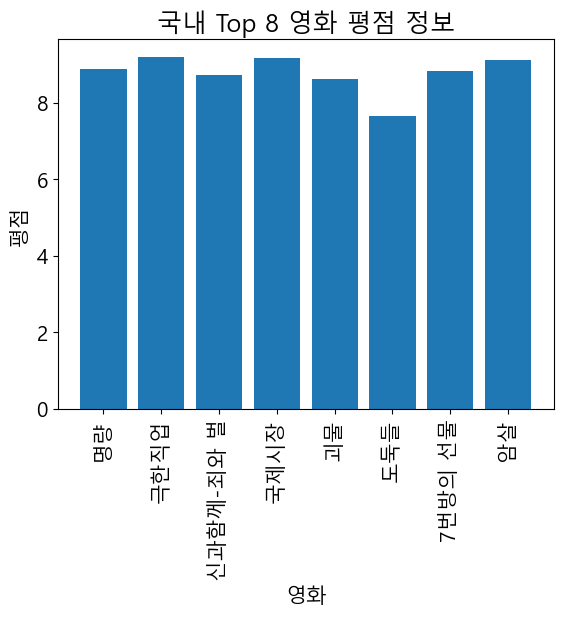

In [6]:
plt.bar(df["영화"], df["평점"])
plt.title("국내 Top 8 영화 평점 정보")
plt.xlabel("영화")
plt.xticks(rotation=90)
plt.ylabel("평점")


## 3) 개봉 연도별 평점 변화 추이를 꺾은선 그래프로 그리시오. 

### 연도별 평균 데이터를 구하는 코드는 다음과 같습니다. 

In [8]:
df_group = df.groupby("개봉 연도").mean("numeric_only")
df_group


,관객 수,평점
개봉 연도,,
2006,1301.0,8.62
2012,1298.0,7.64
2013,1281.0,8.83
2014,1593.5,9.02
2015,1270.0,9.10
2017,1441.0,8.73
2019,1626.0,9.20


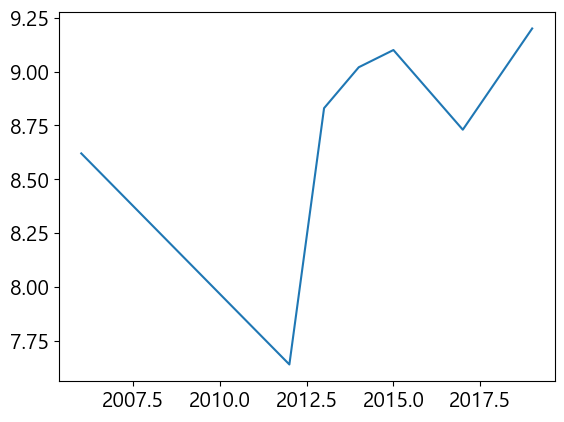

In [15]:
plt.plot(df_group.index, df_group["평점"])


## 4) 앞에서 만든 그래프에 제시된 세부 사항을 적용하시오. 

- marker: "o"
- x 축 눈금: 5년 단위 (2005, 2010, 2015, 2020)
- y 축 눈금: 최소 7, 최대 10

(7.0, 10.0)

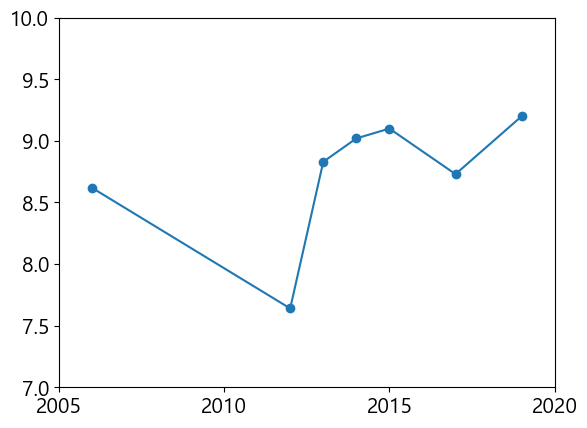

In [17]:
plt.plot(df_group.index, df_group["평점"], marker="o")
plt.xticks([2005 + a * 5 for a in range(4)])
plt.ylim(7, 10)


## 5) 평점이 9점 이상인 영화의 비율을 확인할 수 있는 원 그래프를 제시된 세부 사항을 적용하여 그리시오. 

- label: 9점 이상 / 9점 미만
- 퍼센트: 소숫점 첫째자리까지 표시
- 볌례: 그래프 우측에 표시

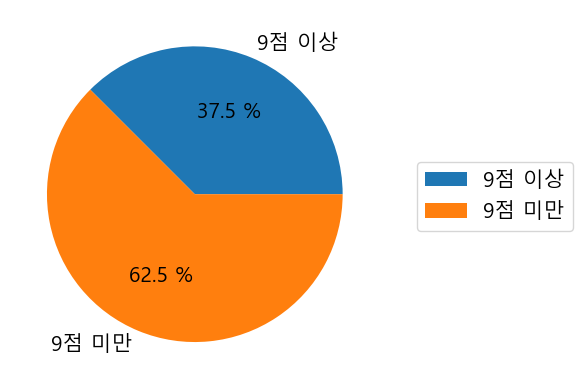

In [49]:
df_group = df.groupby(df["평점"] >= 9).size()
df_group.sort_index(ascending=False, inplace=True)

values = [size for size in df_group]
labels = ["9점 이상" if label else "9점 미만" for label in df_group.index]
# labels = []
# for label in df_group.index:
#     if label == True:
#         labels.append("9점 이상")
#     else:
#         labels.append("9점 미만")

# filt = df["평점"] >= 9
# values = [len(df[filt]), len(df[~filt])]
# index = ["9점 이상", "9점 미만"]

plt.pie(values, labels=labels, autopct="%.1f %%")
plt.legend(loc=(1.1, 0.4))
